In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.2 MB/s eta 0:00:00


**1.IMPORTING DEPENDENCIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings('ignore')

**2.DATA LOADING,UNDERSTANDING AND CLEANING**

In [3]:
df  = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.drop('customerID', axis=1, inplace=True)

In [9]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [11]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [14]:
df.duplicated().sum()

np.int64(22)

In [15]:
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("-"*50)

Unique values in column 'gender':
['Female' 'Male']
--------------------------------------------------
Unique values in column 'Partner':
['Yes' 'No']
--------------------------------------------------
Unique values in column 'Dependents':
['No' 'Yes']
--------------------------------------------------
Unique values in column 'PhoneService':
['No' 'Yes']
--------------------------------------------------
Unique values in column 'MultipleLines':
['No phone service' 'No' 'Yes']
--------------------------------------------------
Unique values in column 'InternetService':
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Unique values in column 'OnlineSecurity':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in column 'OnlineBackup':
['Yes' 'No' 'No internet service']
--------------------------------------------------
Unique values in column 'DeviceProtection':
['No' 'Yes' 'No internet service']
--------------

**3.EDA**

<Axes: xlabel='Churn'>

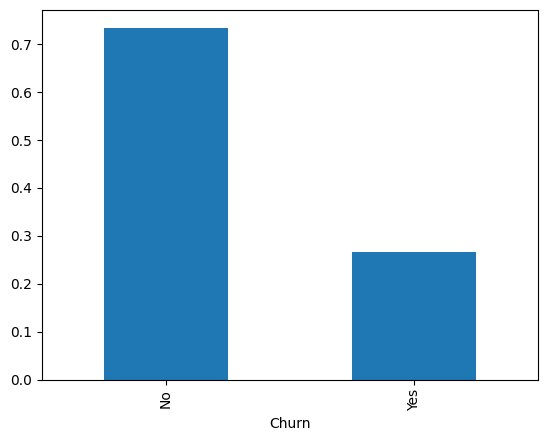

In [16]:
df["Churn"].value_counts(normalize=True).plot.bar()

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


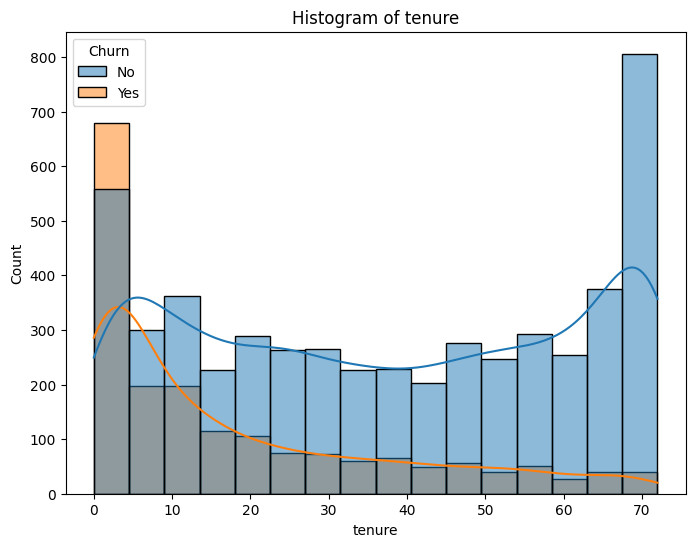

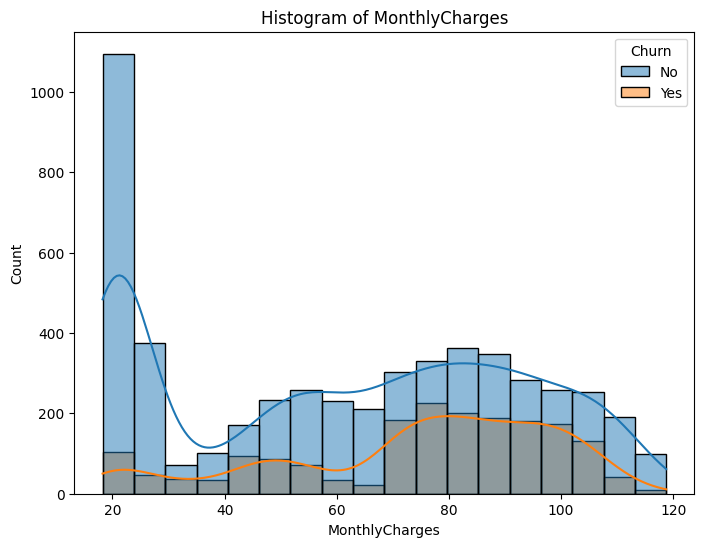

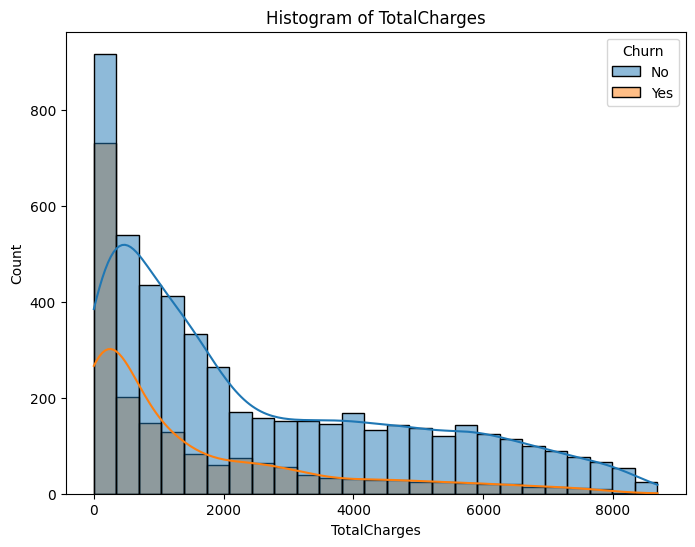

In [18]:
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

for col in numerical_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=df[col],hue="Churn", kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

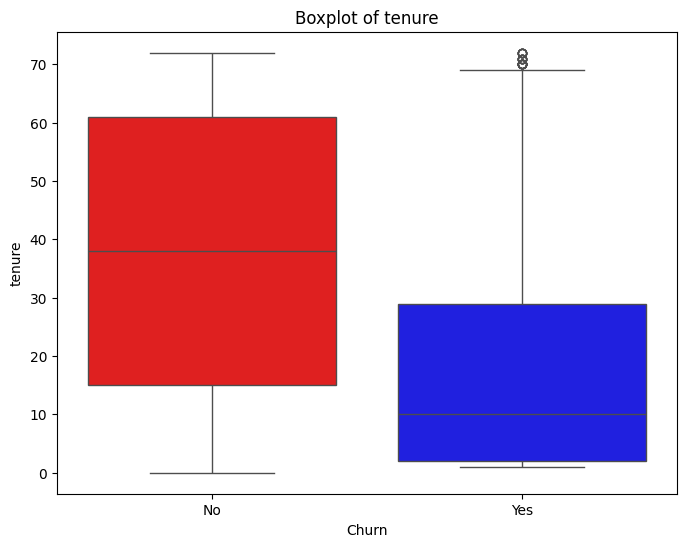

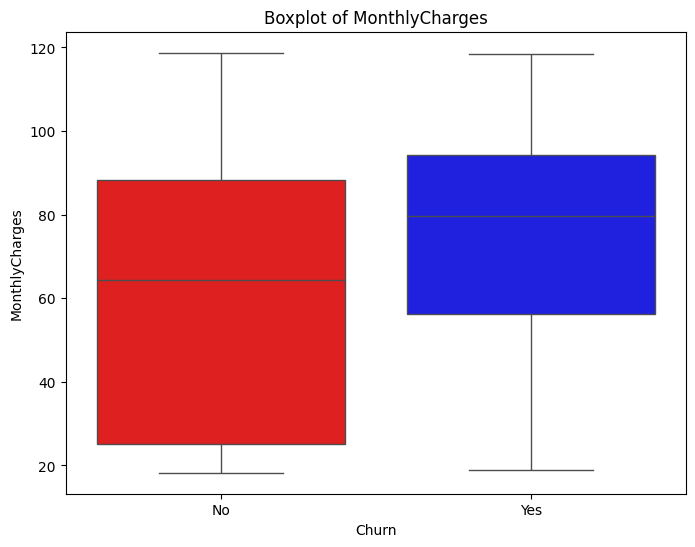

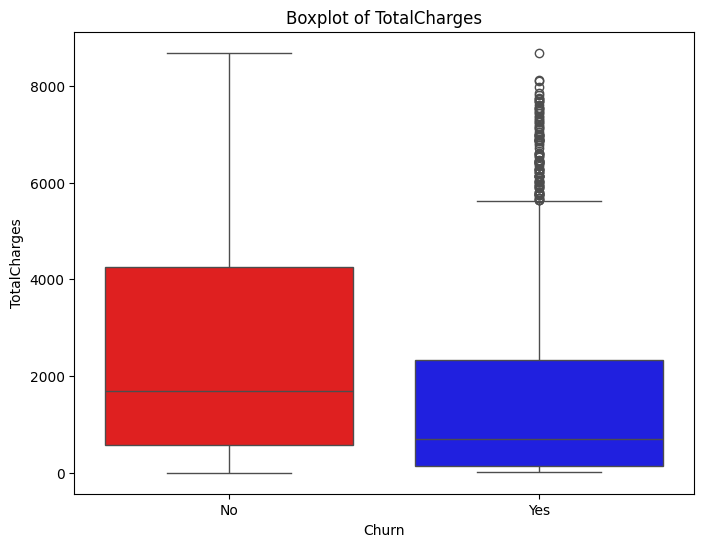

In [19]:
for col in numerical_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(data=df,x="Churn",y=col,palette = ['red','blue'])
  plt.xlabel("Churn")
  plt.ylabel(col)
  plt.title(f"Boxplot of {col}")
  plt.show()

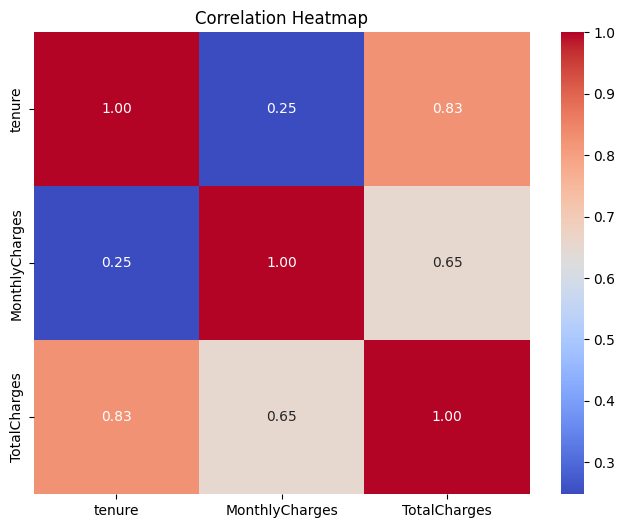

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

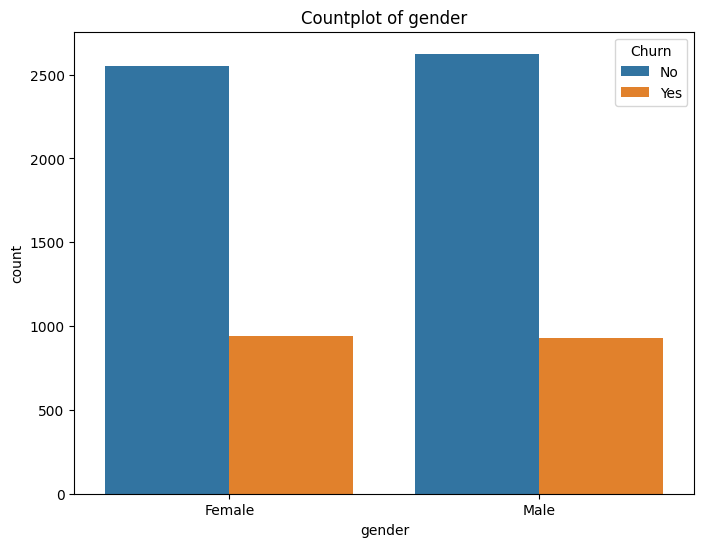

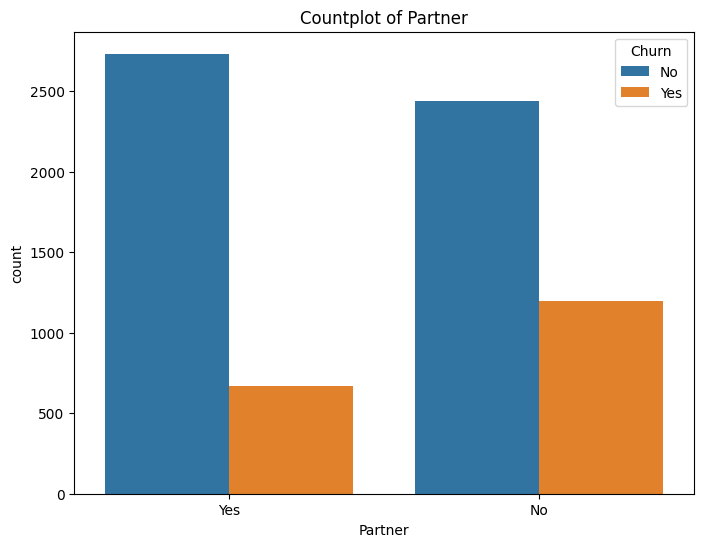

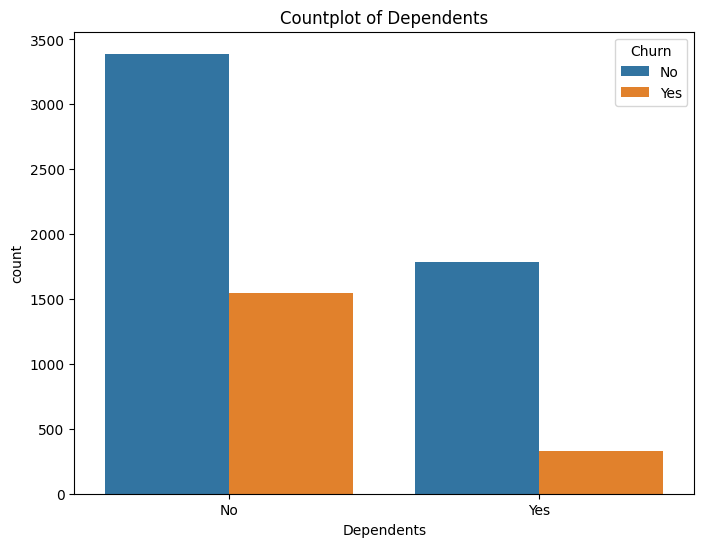

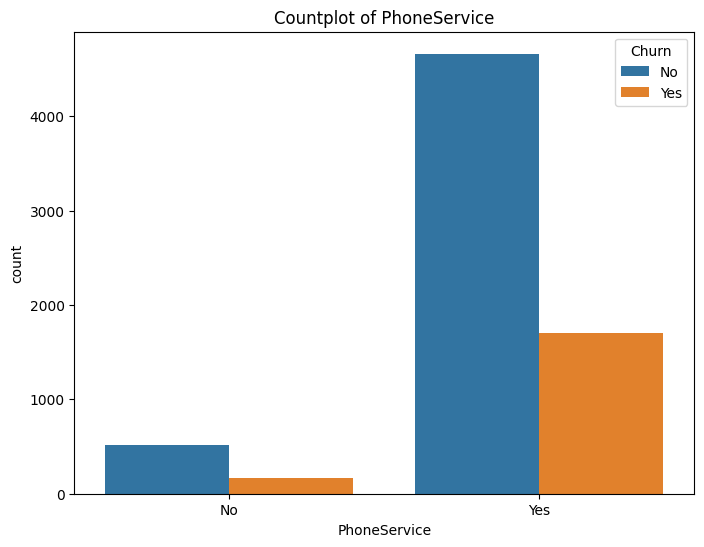

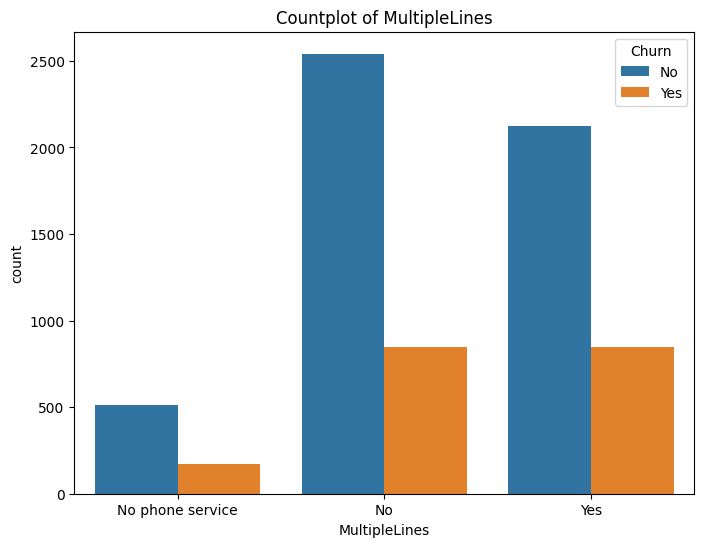

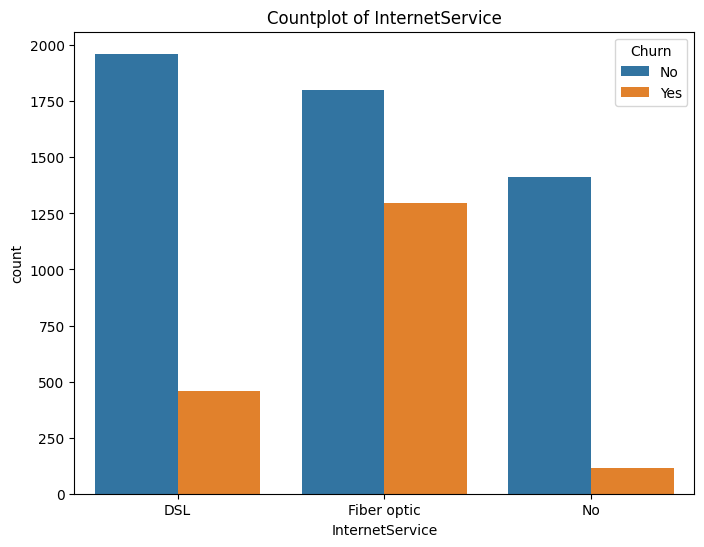

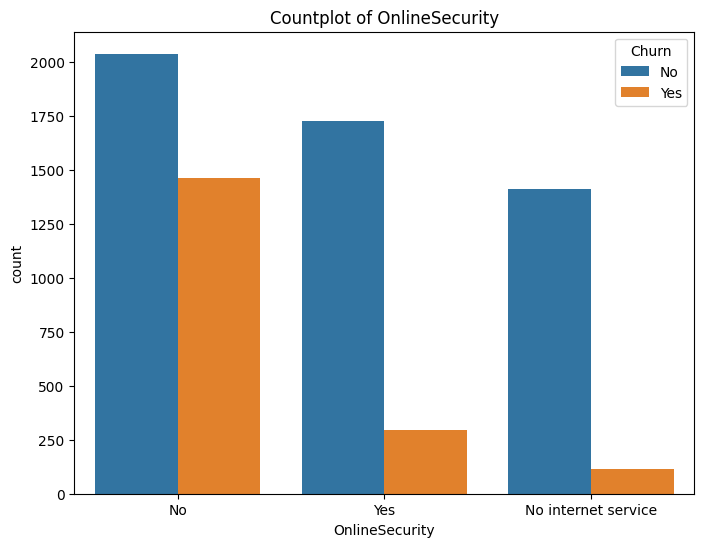

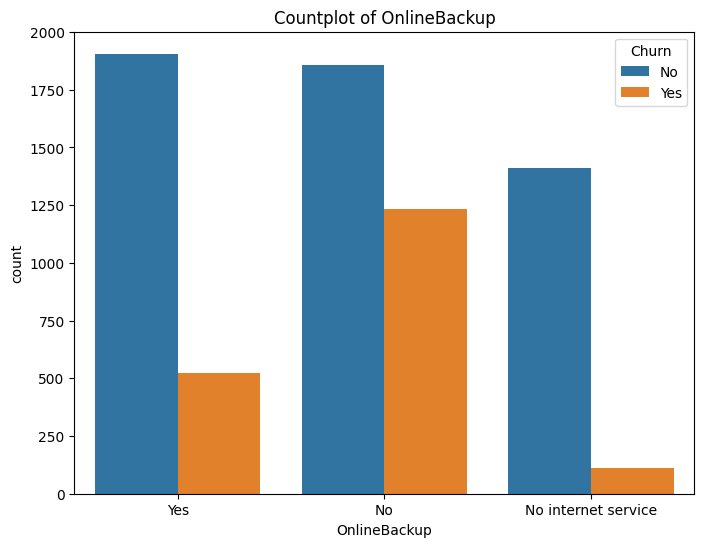

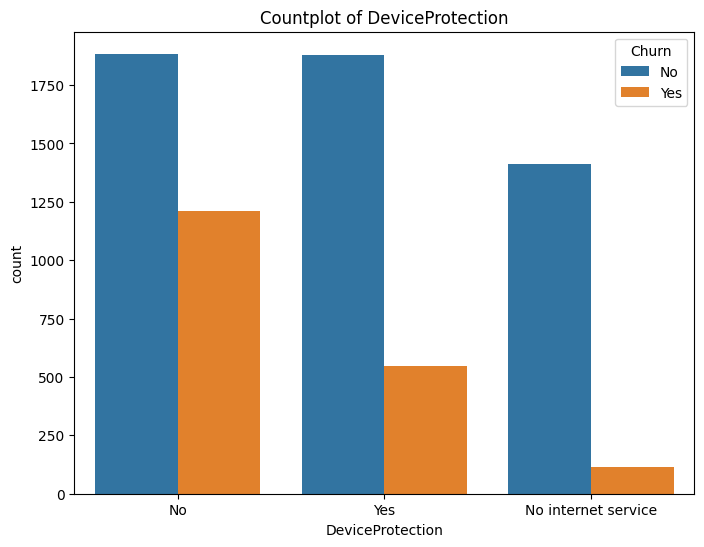

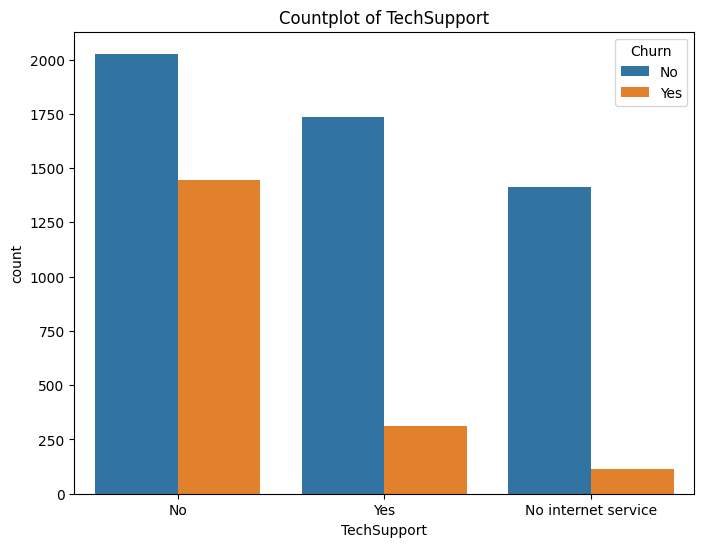

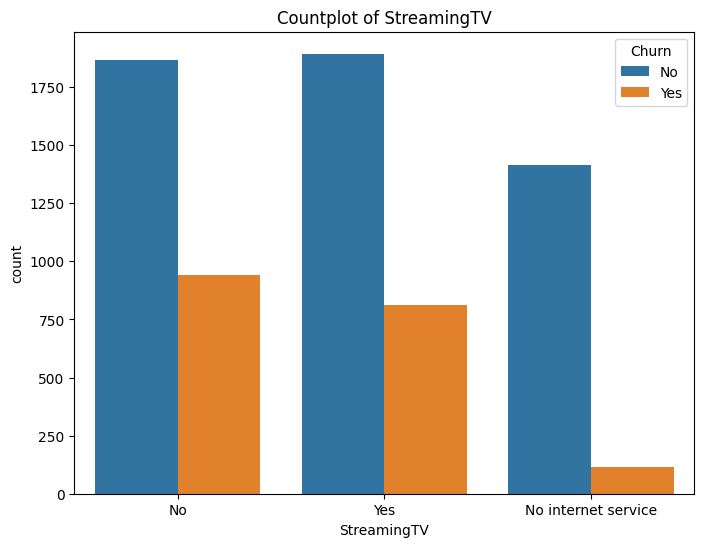

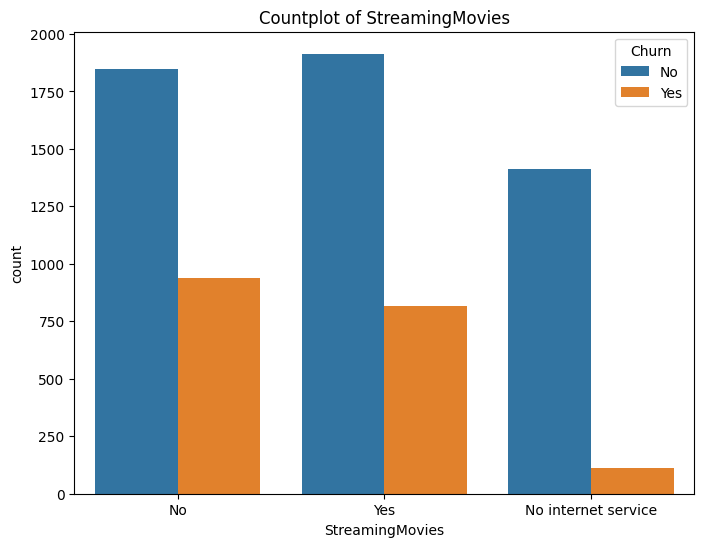

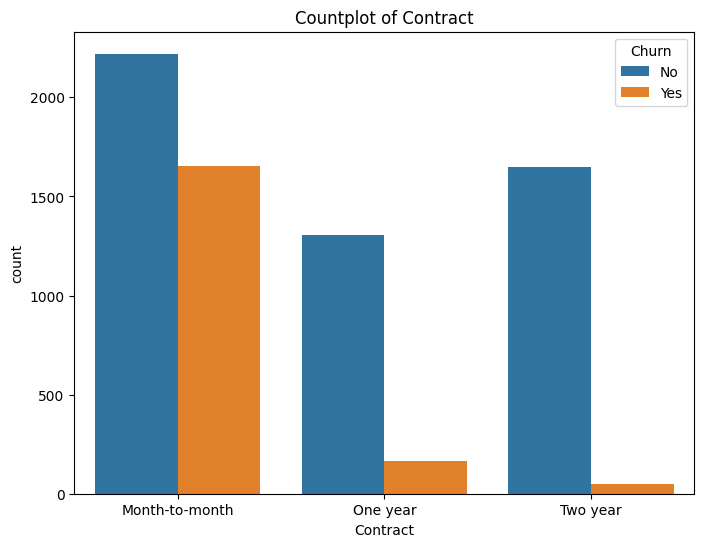

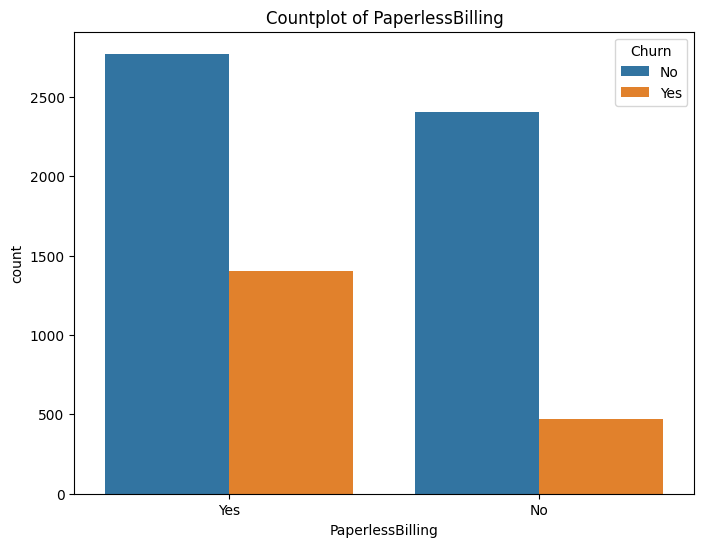

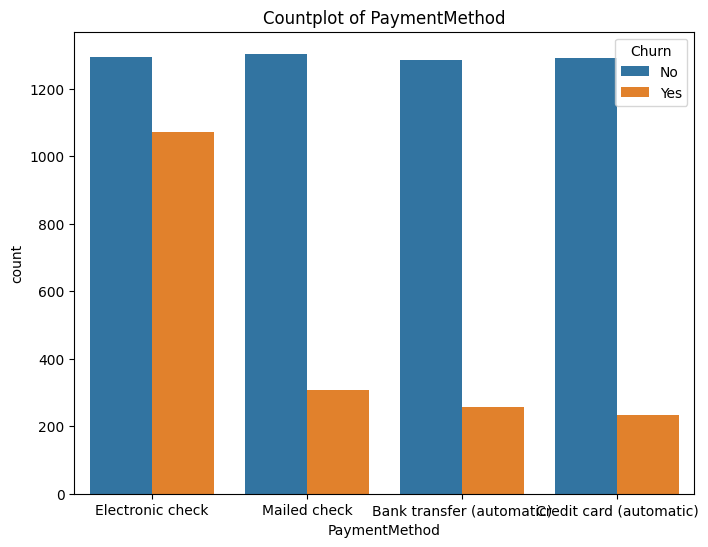

In [21]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
  if col != "Churn":
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,hue="Churn")
    plt.title(f"Countplot of {col}")
    plt.show()

**4.DATA PREPROCESSING**

In [22]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
dummytable = pd.get_dummies(df[categorical_columns], drop_first=True).astype(int)
dummytable.head()


,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [25]:
minput = pd.concat([df.drop(categorical_columns, axis=1), dummytable], axis=1)
minput.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [26]:
X = minput.drop(columns=["Churn"])
y = minput["Churn"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5.MODEL TRAINING AND TUNING**

In [28]:
model =  XGBClassifier(random_state=42)

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
print("Training XGBoost with default parameters")
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="recall")
print(f"XGBoost cross-validation recall: {np.mean(scores):.2f}")

Training XGBoost with default parameters
XGBoost cross-validation recall: 0.50


In [31]:
number_non_churn = y_train.value_counts()[0]
number_churn = y_train.value_counts()[1]
scale_weight = number_non_churn / number_churn

print(f" calculated scale_pos_weight: {scale_weight:.2f}")

 calculated scale_pos_weight: 2.77


In [32]:
def objective_weighted(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'use_label_encoder': False,
        'random_state': 42,
        'scale_pos_weight': scale_weight,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }


    model = XGBClassifier(**param)


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')

    return scores.mean()



In [33]:
sampler = TPESampler(seed=42)

study_weighted = optuna.create_study(direction='maximize')
study_weighted.optimize(objective_weighted, n_trials=50)

[I 2025-12-05 14:45:19,434] A new study created in memory with name: no-name-7875203b-0ee6-4ec1-ae49-fc082944d299
[I 2025-12-05 14:45:20,438] Trial 0 finished with value: 0.7386488294314382 and parameters: {'n_estimators': 118, 'max_depth': 8, 'learning_rate': 0.050350055070586305, 'lambda': 0.24806445753517506, 'alpha': 4.700307140413443e-08, 'subsample': 0.7862873705906961, 'colsample_bytree': 0.503316423348021, 'min_child_weight': 8}. Best is trial 0 with value: 0.7386488294314382.
[I 2025-12-05 14:45:23,353] Trial 1 finished with value: 0.684499442586399 and parameters: {'n_estimators': 621, 'max_depth': 5, 'learning_rate': 0.0664298025798164, 'lambda': 0.0038409014745253373, 'alpha': 2.6208023927419244e-06, 'subsample': 0.5696720116198781, 'colsample_bytree': 0.7159002363046583, 'min_child_weight': 8}. Best is trial 0 with value: 0.7386488294314382.
[I 2025-12-05 14:45:24,036] Trial 2 finished with value: 0.8215295429208472 and parameters: {'n_estimators': 152, 'max_depth': 3, 'le

**6.MODEL EVALUATION**

In [34]:
best_params_weighted = study_weighted.best_params
best_params_weighted['scale_pos_weight'] = scale_weight

final_model_weighted = XGBClassifier(**best_params_weighted, random_state=42)
final_model_weighted.fit(X_train, y_train)

y_pred_weighted = final_model_weighted.predict(X_test)

In [35]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_weighted))

print("-"*200)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_weighted))
print("-"*200)
print("ACCURACY SCORE")
print(accuracy_score(y_test, y_pred_weighted))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1036
           1       0.52      0.85      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
CONFUSION MATRIX
[[737 299]
 [ 55 318]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ACCURACY SCORE
0.7487579843860894


**7.IMPORTANT FEATURES FOR PREDICTING CHURN**

In [36]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model_weighted.feature_importances_
})

In [37]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

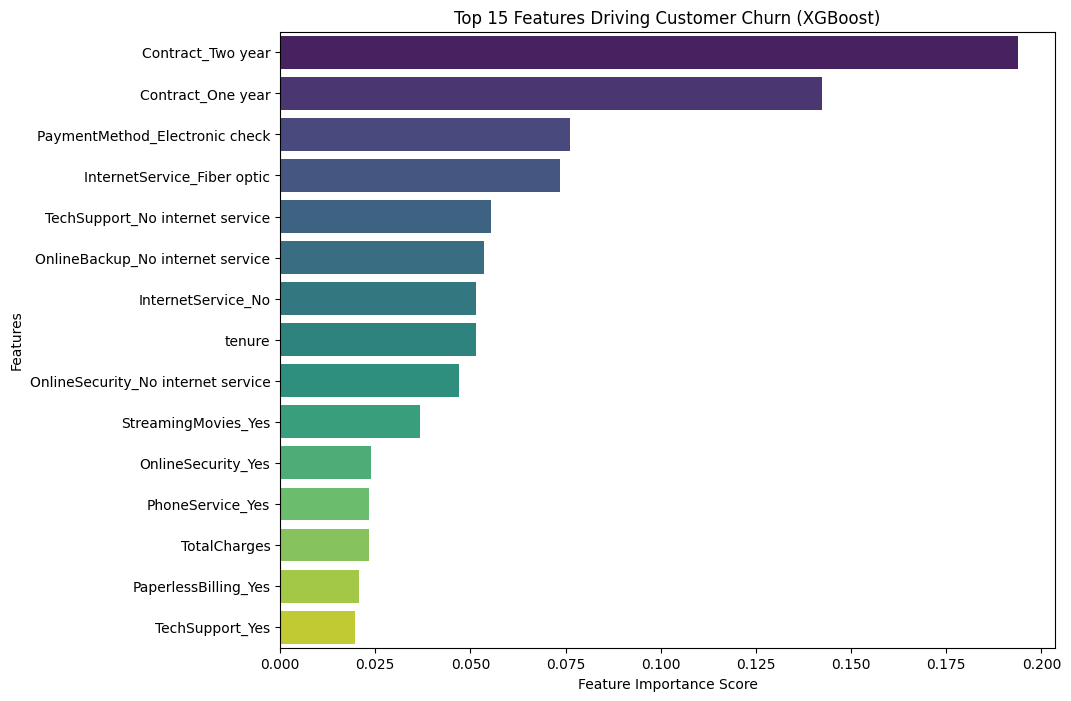

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Features Driving Customer Churn (XGBoost)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()